In [1]:
!pip install feature_engine imbalanced_learn

# Importing the necessary Python Packages

In [2]:
import math
import operator
import numpy as NumPy
import pandas as Pandas
import matplotlib.pyplot as PyPlot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as SeaBorn
from matplotlib import gridspec
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from feature_engine.encoding import WoEEncoder, RareLabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import webbrowser

In [3]:
column_dtypes = {
    'cc_num':'object',
    'zip': 'object'
}
Pandas.set_option('display.max_columns', None)

In [4]:
path = 'DataSet/fraudtrain.csv'
DataFeed = Pandas.read_csv(path, index_col=0, dtype=column_dtypes, parse_dates=['trans_date_trans_time', 'dob'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Showcasing Basic information such as column name and datatype, of the dataset used in the project

In [5]:
DataFeed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  object        
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  object        
 12  lat                    12966

## Adding Column names into a variable for using in fututre for data encoding ( converting data from string to integear form)

In [6]:
columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'lat', 'long', 'job', 'dob','merch_lat', 'merch_long', 'is_fraud']

# Show casing first five data entries as a sample of the dataset used

In [7]:
DataFeed.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Adding Age Column in the data by take difference of year of birth from present year

In [8]:
DataFeed['age'] = NumPy.rint((Pandas.to_datetime('now') - DataFeed['dob']) / NumPy.timedelta64(1, 'Y'))

# Show casing first five data entries as a sample of the dataset used post addition of age column in it

In [9]:
DataFeed.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,43.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0


# Seaborn Pairplot of The Data

In [10]:
'''SeaBorn.pairplot(DataFeed)'''

'SeaBorn.pairplot(DataFeed)'

In [11]:
def DataPreproccessing():
    print(DataFeed.isnull().sum())
    print(DataFeed.isnull().values.any())
    

In [12]:
DataPreproccessing()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
dtype: int64
False


# Graphical Representation of Where how many authenticate and fraud transaction in various categories

<AxesSubplot:title={'center':'Number of frauds by categories'}, xlabel='category', ylabel='cc_num'>

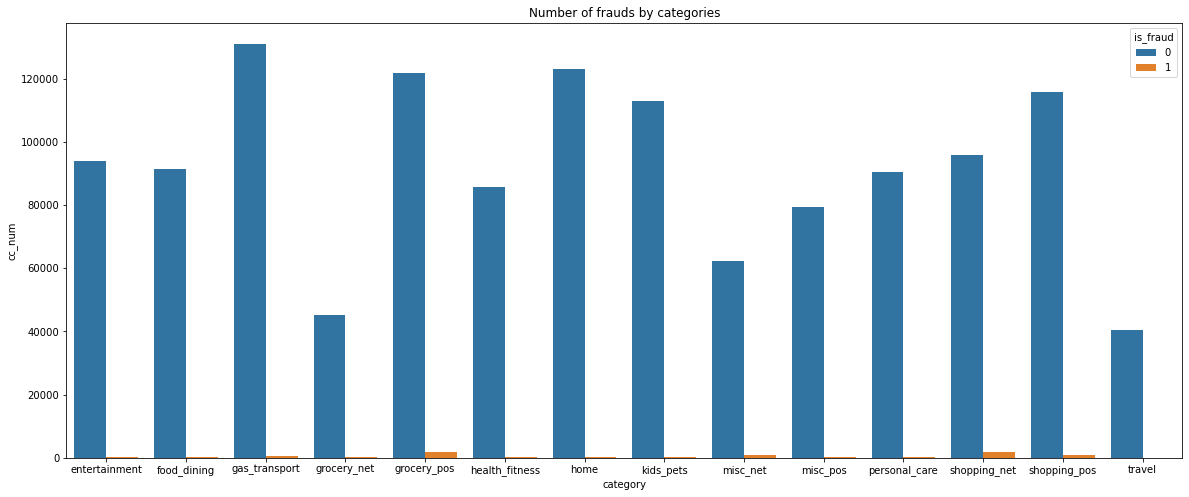

In [13]:
PyPlot.figure(figsize=(20,8))
PyPlot.title('Number of frauds by categories')
SeaBorn.barplot(x="category", y='cc_num' ,hue="is_fraud", data=DataFeed.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())

# Graphical Bifaction of Data on the bases of being fraud transaction or authenticate to the avg amount spent on that transaction

<AxesSubplot:title={'center':'Number of frauds by the average amount of money spent'}, xlabel='is_fraud', ylabel='amt'>

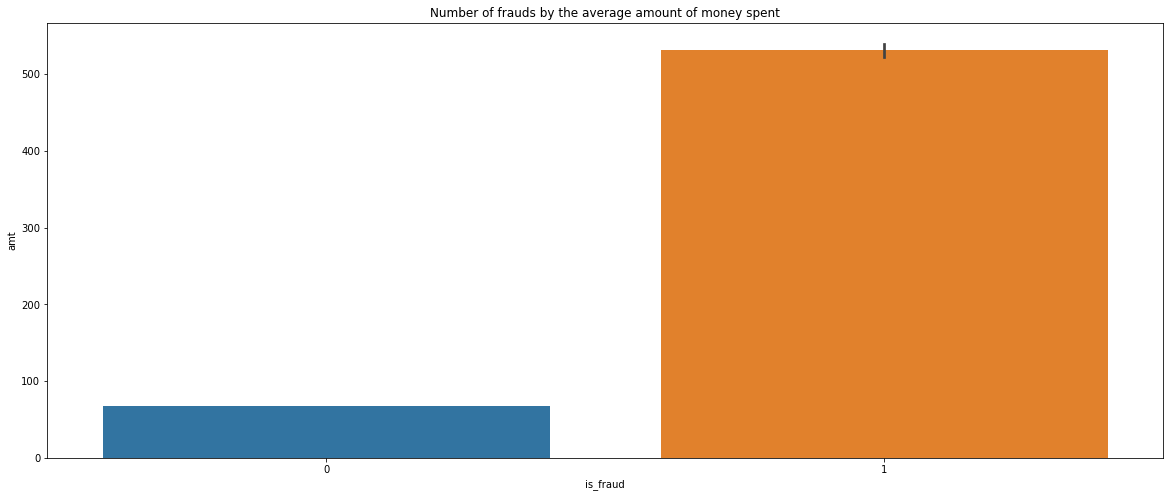

In [14]:
PyPlot.figure(figsize=(20,8))
PyPlot.title('Number of frauds by the average amount of money spent')
SeaBorn.barplot(x="is_fraud", y='amt', data=DataFeed)

# Describing the Features of the dataset which are gonna be used in the training of our deep learning and machine learning algorithms and making train variable 

In [15]:
ColumnFeatures = ['category', 'amt', 'gender', 'lat', 'long', 'job', 'age','merch_lat', 'merch_long', 'is_fraud']
X = DataFeed.copy()[ColumnFeatures]
y = X.pop('is_fraud')

# Counting number of records in our dataset  By Number Of Being Fraud And Authenticatic

In [16]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# Data Encoding Functions And Libraries for Encoding The Data 

In [17]:
RareEncoder = RareLabelEncoder(tol=0.005, n_categories=1, variables=['category', 'gender','job'])
EncodedData = RareEncoder.fit_transform(X)
woe_encoder = WoEEncoder(variables=['category', 'gender','job'])
woe_encoder.fit(EncodedData , y)
def TransFormData(X):
    EncodedData = RareEncoder.transform(X)
    return woe_encoder.transform(EncodedData)

# Example Of How Data Is Gonna Be Encoded

In [18]:
woe_encoder.encoder_dict_

{'category': {'entertainment': -0.8516286992560543,
  'food_dining': -1.2586853497760662,
  'gas_transport': -0.21072666983832336,
  'grocery_net': -0.6775693805711962,
  'grocery_pos': 0.8984981511385185,
  'health_fitness': -1.3227451854687005,
  'home': -1.2849471761148556,
  'kids_pets': -1.0108222014735257,
  'misc_net': 0.9241027325901408,
  'misc_pos': -0.6148052966631049,
  'personal_care': -0.8738469816900943,
  'shopping_net': 1.1217208340057077,
  'shopping_pos': 0.2231471164740934,
  'travel': -0.7067216727288238},
 'gender': {'F': -0.0959983025717894, 'M': 0.1051331115173589},
 'job': {'Agricultural consultant': -0.3930992956626496,
  'Chartered public finance accountant': -0.6897345182410528,
  'Chief Executive Officer': -0.32650034347284274,
  'Comptroller': -0.5739632665653881,
  'Copywriter, advertising': 0.08472199460762161,
  'Designer, ceramics/pottery': -1.3825164909327965,
  'Environmental consultant': -0.6888932332393649,
  'Exhibition designer': -0.0434145193989

# Passing Our Train Data To Make It Encoded

In [19]:
TransFormData(X)

,category,amt,gender,lat,long,job,age,merch_lat,merch_long
0,0.924103,4.97,-0.095998,36.0788,-81.1781,0.032767,34.0,36.011293,-82.048315
1,0.898498,107.23,-0.095998,48.8878,-118.2105,0.032767,43.0,49.159047,-118.186462
2,-0.851629,220.11,0.105133,42.1808,-112.2620,0.032767,60.0,43.150704,-112.154481
3,-0.210727,45.00,0.105133,46.2306,-112.1138,0.032767,55.0,47.034331,-112.561071
4,-0.614805,41.96,0.105133,38.4207,-79.4629,0.032767,36.0,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...
1296670,-0.851629,15.56,0.105133,37.7175,-112.4777,0.032767,60.0,36.841266,-111.690765
1296671,-1.258685,51.70,0.105133,39.2667,-77.5101,0.032767,42.0,38.906881,-78.246528
1296672,-1.258685,105.93,0.105133,32.9396,-105.8189,0.053227,54.0,33.619513,-105.130529
1296673,-1.258685,74.90,0.105133,43.3526,-102.5411,0.032767,41.0,42.788940,-103.241160


# Because there are not many records labeled 1, I will undersample to balance the data and reduce training time


In [20]:
RandomSampler = RandomUnderSampler(random_state=42)

# Taking Data For Testing 

In [21]:
TestPath = 'DataSet/fraudTest.csv'
DataFeed_test = Pandas.read_csv(TestPath, index_col=0, dtype=column_dtypes, parse_dates=['trans_date_trans_time', 'dob'])
DataFeed_test['age'] = NumPy.rint((Pandas.to_datetime('now') - DataFeed['dob']) / NumPy.timedelta64(1, 'Y'))

# Data For Testing Data

In [22]:
TestData = DataFeed_test.copy()[ColumnFeatures]
y_test = TestData.pop('is_fraud')
TestData = TransFormData(TestData)

# Balancing Train And Test Data To Reduce Training And Testing Of Models By A Great Extent

In [23]:
TrainDataSet, Y_Train_Data = RandomSampler.fit_resample(TransFormData(X), y)
TestDataFinal, Y_Test_Data = RandomSampler.fit_resample(TestData, y_test)

In [24]:
def plot_confusion(y_test, y_pred):
  display_labels = ['Genuine', 'Fraudulent']
  cm = confusion_matrix(y_test, y_pred, normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels)
  disp = disp.plot(cmap='Blues', xticks_rotation=30)
  PyPlot.show()

# Variables For Storing And Exporting Results Of Data

In [25]:
ClassificationReport=[]
AccuracyScoreList=[]
PrecisionScoreList=[]
F1ScoreList=[]
RecallScoreList=[]


# Training Of Various Supervised Machine Learning And Deep Learning Algorithm


# 1. Random Forest Tree Algorithm

In [26]:
def RandomForestFunction():
    parameters = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}
    RandomForestModel = RandomForestClassifier()
    Classifier = GridSearchCV(RandomForestModel, parameters,scoring='accuracy',cv=5)
    Classifier.fit(TrainDataSet, Y_Train_Data)
    ModelPrediction = Classifier.predict(TestDataFinal)
    print('Classification Report of Random Forest Tree Algorithm')
    print(classification_report(Y_Test_Data, ModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, ModelPrediction))
    print('\n\nAccuracy score of the Random Forest Tree model is = ',accuracy_score(Y_Test_Data, ModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, ModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, ModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, ModelPrediction))
    print('\n\nConfusion Matrix Of Random Forest Tree Model')
    plot_confusion(Y_Test_Data,ModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, ModelPrediction, average='macro'))

    
    #ROC Curve 
    ModelPrediction_Probability = Classifier.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("ROC Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Random Forest Tree Algorithm
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2145
           1       0.95      0.91      0.93      2145

    accuracy                           0.93      4290
   macro avg       0.93      0.93      0.93      4290
weighted avg       0.93      0.93      0.93      4290



Accuracy score of the Random Forest Tree model is =  0.9328671328671329


Confusion Matrix Of Random Forest Tree Model


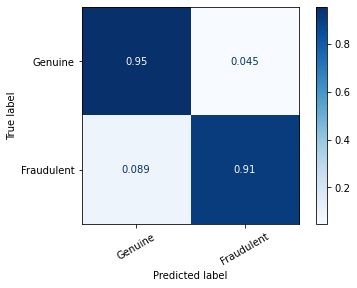

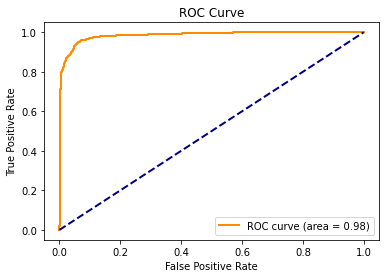

In [27]:
RandomForestFunction()

# 2. Sample Vector Machine Algorithm

In [28]:
def SampleVectorModelFunction():
    SampleVectorMachineModel = SVC(probability=True)
    SampleVectorMachineModel.fit(TrainDataSet, Y_Train_Data)
    SampleVectorMachineModelPrediction = SampleVectorMachineModel.predict(TestDataFinal)
    print('Classification Report of Sample Vector Machine Algorithm')
    print(classification_report(Y_Test_Data, SampleVectorMachineModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, SampleVectorMachineModelPrediction))
    print('\n\nAccuracy score of the Sample Vector Machine model is = ',accuracy_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    print('\n\nConfusion Matrix Of Sample Vector Machine Model')
    plot_confusion(Y_Test_Data,SampleVectorMachineModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, SampleVectorMachineModelPrediction, average='macro'))

    #ROC Curve 
    ModelPredictioNumPyrobability = SampleVectorMachineModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPredictioNumPyrobability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Sample Vector Machine Algorithm
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2145
           1       0.96      0.75      0.84      2145

    accuracy                           0.86      4290
   macro avg       0.88      0.86      0.86      4290
weighted avg       0.88      0.86      0.86      4290



Accuracy score of the Sample Vector Machine model is =  0.8589743589743589


Confusion Matrix Of Sample Vector Machine Model


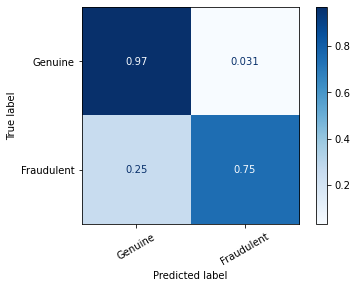

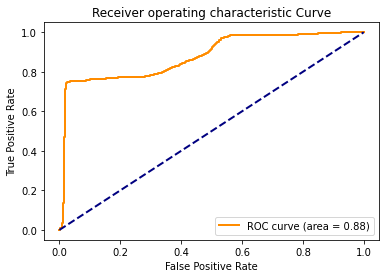

In [29]:
SampleVectorModelFunction()

# 3. Decision Tree Model

In [30]:
def DecisionTreeModelFunction():
    DecisionTreeModel = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
    DecisionTreeModel.fit(TrainDataSet, Y_Train_Data)
    DecisionTreeModelPrediction = DecisionTreeModel.predict(TestDataFinal)
    print('Classification Report of Decision Tree Model ')
    print(classification_report(Y_Test_Data, DecisionTreeModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, DecisionTreeModelPrediction))
    print('\n\nAccuracy score of the Decision Tree model is = ',accuracy_score(Y_Test_Data, DecisionTreeModelPrediction))
    print('\n\nConfusion Matrix Of Decision Tree Model')
    plot_confusion(Y_Test_Data, DecisionTreeModelPrediction)
  
    
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, DecisionTreeModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, DecisionTreeModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, DecisionTreeModelPrediction))
    RecallScoreList.append(recall_score(Y_Test_Data, DecisionTreeModelPrediction, average='macro'))

    #ROC Curve For This Model
    ModelPrediction_Probability = DecisionTreeModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()


Classification Report of Decision Tree Model 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2145
           1       0.98      0.81      0.89      2145

    accuracy                           0.90      4290
   macro avg       0.91      0.90      0.90      4290
weighted avg       0.91      0.90      0.90      4290



Accuracy score of the Decision Tree model is =  0.8988344988344988


Confusion Matrix Of Decision Tree Model


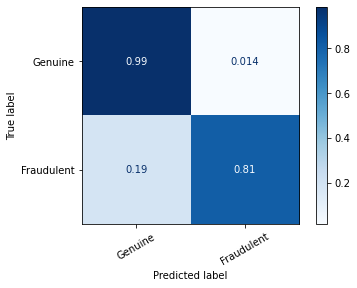

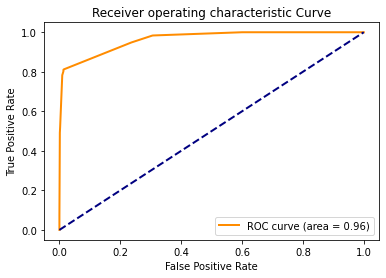

In [31]:
DecisionTreeModelFunction()

# 4. Kth Nearest Neighbour Model

In [32]:
def KNearestNeighbourModelFunction():
    n = 5
    KNeighbourModel = KNeighborsClassifier(n_neighbors = n)
    KNeighbourModel.fit(TrainDataSet, Y_Train_Data)
    KNeighbourModelPrediction = KNeighbourModel.predict(TestDataFinal)
    print('Classification Report of Kth Nearest Neighbour Model')
    print(classification_report(Y_Test_Data, KNeighbourModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, KNeighbourModelPrediction))
    print('\n\nAccuracy score of the Kth Nearest Neighbour model is = ',accuracy_score(Y_Test_Data, KNeighbourModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, KNeighbourModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, KNeighbourModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, KNeighbourModelPrediction))
    print('\n\nConfusion Matrix Of Kth Nearest Neighbour Model')
    plot_confusion(Y_Test_Data,KNeighbourModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, KNeighbourModelPrediction, average='macro'))
        #ROC Curve
    ModelPrediction_Probability = KNeighbourModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Kth Nearest Neighbour Model
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2145
           1       0.86      0.85      0.86      2145

    accuracy                           0.86      4290
   macro avg       0.86      0.86      0.86      4290
weighted avg       0.86      0.86      0.86      4290



Accuracy score of the Kth Nearest Neighbour model is =  0.8566433566433567


Confusion Matrix Of Kth Nearest Neighbour Model


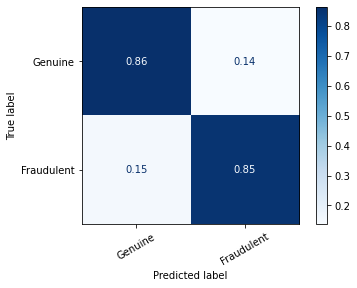

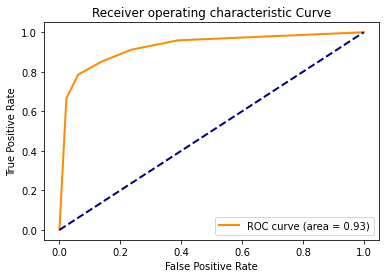

In [33]:
KNearestNeighbourModelFunction()

# 5. Logistic Regression

In [34]:
def LogisticRegressionModelFunction():
    LogisticRegressionModel = LogisticRegression(solver='lbfgs', max_iter=1000)
    LogisticRegressionModel.fit(TrainDataSet, Y_Train_Data)
    LogisticRegressionModelPrediction = LogisticRegressionModel.predict(TestDataFinal)
    print('Classifaction Report Of Logistic Regression ')
    print(classification_report(Y_Test_Data, LogisticRegressionModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, LogisticRegressionModelPrediction))
    print('\n\nAccuracy score of the Logistic Regression model is = ',accuracy_score(Y_Test_Data, LogisticRegressionModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, LogisticRegressionModelPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, LogisticRegressionModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, LogisticRegressionModelPrediction))
    print('\n\nConfusion Matrix Of Logistic Regression Model')
    plot_confusion(Y_Test_Data,LogisticRegressionModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, LogisticRegressionModelPrediction, average='macro'))

    #ROC Curve
    ModelPrediction_Probability = LogisticRegressionModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classifaction Report Of Logistic Regression 
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2145
           1       0.95      0.74      0.83      2145

    accuracy                           0.85      4290
   macro avg       0.87      0.85      0.85      4290
weighted avg       0.87      0.85      0.85      4290



Accuracy score of the Logistic Regression model is =  0.8508158508158508


Confusion Matrix Of Logistic Regression Model


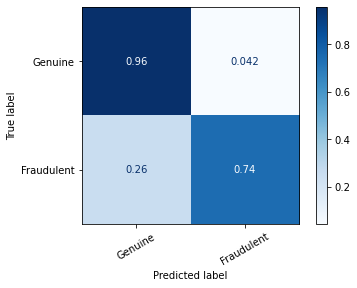

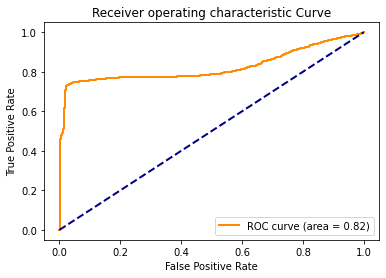

In [35]:
LogisticRegressionModelFunction()

In [36]:
def NeuralNetworks():
    MLPC = MLPClassifier(hidden_layer_sizes=(5000,), max_iter=50000)
    MLPC.fit(TrainDataSet, Y_Train_Data)
    NeuralNetworkPrediction = MLPC.predict(TestDataFinal)
    # Obtenemos valores de recall
    recall_acc = recall_score (Y_Test_Data,NeuralNetworkPrediction)
    print('Classifaction Report Of Neural Network ')
    print(classification_report(Y_Test_Data, NeuralNetworkPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, NeuralNetworkPrediction))
    print('\n\nAccuracy score of the Neural Network model is = ',accuracy_score(Y_Test_Data, NeuralNetworkPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, NeuralNetworkPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, NeuralNetworkPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, NeuralNetworkPrediction))
    print('\n\nConfusion Matrix Of Neural Network Model')
    plot_confusion(Y_Test_Data,NeuralNetworkPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, NeuralNetworkPrediction, average='macro'))

    #ROC Curve
    ModelPrediction_Probability = MLPC.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   

Classifaction Report Of Neural Network 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2145
           1       0.92      0.92      0.92      2145

    accuracy                           0.92      4290
   macro avg       0.92      0.92      0.92      4290
weighted avg       0.92      0.92      0.92      4290



Accuracy score of the Neural Network model is =  0.9233100233100233


Confusion Matrix Of Neural Network Model


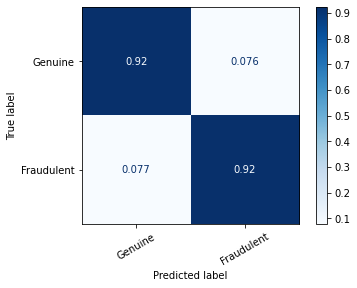

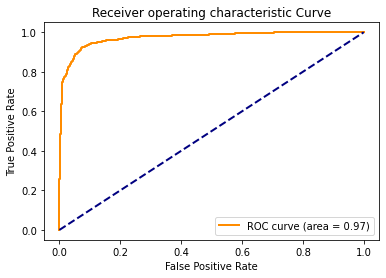

In [37]:
NeuralNetworks()

# Graph comparing all Models Accuracies

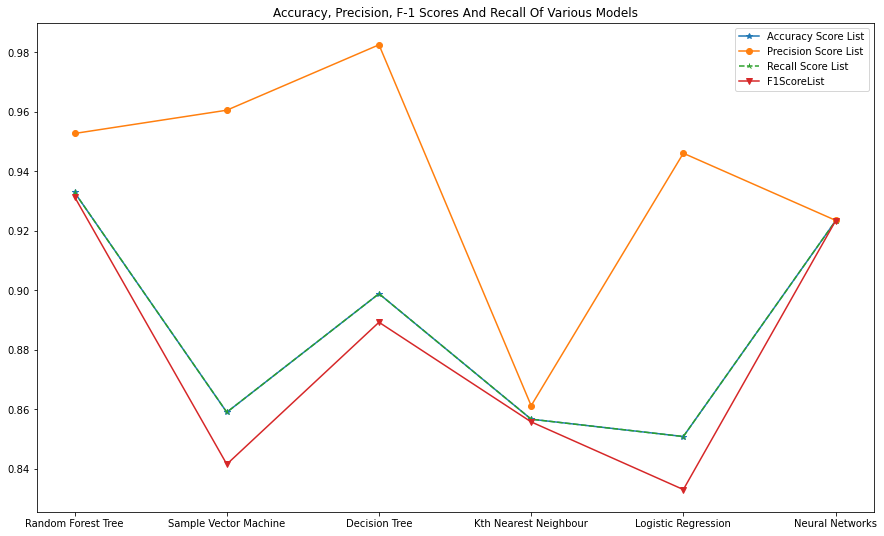

In [40]:
y = AccuracyScoreList
ModelName=['Random Forest Tree','Sample Vector Machine','Decision Tree','Kth Nearest Neighbour','Logistic Regression','Neural Networks']
f = PyPlot.figure()
f.set_figwidth(15)
f.set_figheight(9)
PyPlot.plot( ModelName,AccuracyScoreList, marker="*",label ='Accuracy Score List')
PyPlot.plot( ModelName,PrecisionScoreList, marker="o",label ='Precision Score List')
PyPlot.plot( ModelName,RecallScoreList,linestyle='dashed', marker="2",label ='Recall Score List')
PyPlot.title('Accuracy, Precision, F-1 Scores And Recall Of Various Models')
PyPlot.plot( ModelName,F1ScoreList, marker="v",label ='F1ScoreList')
PyPlot.legend()
PyPlot.show()

# Exporting Files in csv format to open access them in front-end

In [41]:
'''Exporting Files in csv format to open access them in front-end'''
DataDictionary = {'Model Name': ModelName, 'Accuracy': AccuracyScoreList,'Precision Score':PrecisionScoreList ,'Recall Score':RecallScoreList, 'F1Score':F1ScoreList}         
ExportDataFile = Pandas.DataFrame(DataDictionary)   
# saving the dataframe 
ExportDataFile.to_csv('DataSet/DataExported.csv')
ExportDataFile.to_csv('FrontEnd/DataExported.csv')

In [2]:
jt -l

NameError: name 'jt' is not defined

# Opening Front-end Sites

In [4]:
''''''
webbrowser.open("https://ayushaj-16.github.io/Minor-Project/", new=1)
#webbrowser.open("https://Google.com", new=1)

True